In [2]:
#Script to compare CDR length in datasets
#@Author: Henriette Capel
#@Date: 15-03-2022

In [1]:
#Import modules
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
import statsmodels.api as sm
import pandas as pd
import ast
#from ABDB import database as db
import dabest
#%load_ext nb_black

In [2]:
plt.rcParams['figure.dpi'] = 1200

In [3]:
#Functions
def read_dataset(filename_ds):
    
    df = pd.read_csv(filename_ds, converters={i: str for i in range(100)})
    
    for colname in df.columns.values.tolist():
        try:
            df[colname] = [ast.literal_eval(d) for d in df[colname]]
        except:
            pass

    return df

def get_cdr_lengths(cdr_dicts):
    #This function determines collects the cdr lenght information form the dataset
    cdr_types = cdr_dicts[0].keys()
    cdr_types_lengths = {}
    
    #Initialise dictionary by determining keys
    for cdr_type in cdr_types:
        cdr_types_lengths[cdr_type] = []
    
    for cdr_dict in cdr_dicts:
        for cdr_type_key in cdr_dict:
            seq_len = len(cdr_dict[cdr_type_key])
            cdr_types_lengths[cdr_type_key].append(seq_len)
    
    return cdr_types_lengths

def perform_bootstrap(n_sample, interaction_sizes):
    df = pd.DataFrame([np.random.choice(interaction_sizes[k],n_sample,replace=False) for k in interaction_sizes]).T
    df.columns = [k for k in interaction_sizes]
    x = dabest.load(df, idx=(list(interaction_sizes.keys())[0],list(interaction_sizes.keys())[1]))
    print(x.mean_diff)

def plot_cdrlenght_histogram(dict_length_1, dict_length_2, ab_type1, ab_type2, color1, color2, xlim):
    MIN_LEN = 1
    MAX_LEN = 32
    for cdr_type in dict_length_1.keys():
        mean_1 = round(np.mean(np.array(dict_length_1[cdr_type])), 2)
        median_1 = round(np.median(np.array(dict_length_1[cdr_type])),2)
        std_1 = round(np.std(np.array(dict_length_1[cdr_type])), 2)
        mean_2 = round(np.mean(np.array(dict_length_2[cdr_type])), 2)
        median_2 = round(np.median(np.array(dict_length_2[cdr_type])),2)
        std_2 = round(np.std(np.array(dict_length_2[cdr_type])), 2)
    
        
        plt.hist(dict_length_1[cdr_type], bins=np.arange(MIN_LEN, MAX_LEN)+0.5, alpha=0.7, density=True, color = color1, label=ab_type1) #\n ({mean_1}, {median_1}, {std_1})")
        plt.hist(dict_length_2[cdr_type], bins=np.arange(MIN_LEN, MAX_LEN)+0.5, alpha=0.7, density=True, color = color2, label=ab_type2) #\n ({mean_2}, {median_2}, {std_2})")
        
        x_max = max(max(dict_length_1[cdr_type]), max(dict_length_2[cdr_type]))+5
        plt.xlim([0, x_max])
        plt.xlabel("Length of CDR-H3 loop", fontsize=12) # NOTE this will be incorrect for other plots
        plt.ylabel("Normalised frequency", fontsize=12)
        # plt.title(f"{cdr_type} length")
        plt.xlim(0, xlim)
        plt.xticks(ticks=np.arange(0,xlim,2), rotation=45)
        plt.legend(fontsize=12)
        # plt.show()
        # plt.savefig(f'{cdr_type}_length.png', bbox_inches='tight')
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.tight_layout()
        plt.show()

In [4]:
#Single domain antibodies
ds_name_nb = "/Users/gemmagordon/Documents/OXFORD/ROTATION 2/henriette/vhh-vh-epitope-comparison/Dataset_nb_filtered.csv"
df_nb = read_dataset(ds_name_nb)
cdr_lengths_nb = get_cdr_lengths(df_nb['cdr_sequence'])

In [5]:
#Full length antibodies
ds_name_fv = "/Users/gemmagordon/Documents/OXFORD/ROTATION 2/henriette/vhh-vh-epitope-comparison/Dataset_fv_filtered.csv"
df_fv = read_dataset(ds_name_fv)
cdr_lengths_fv = get_cdr_lengths(df_fv['cdr_sequence'])

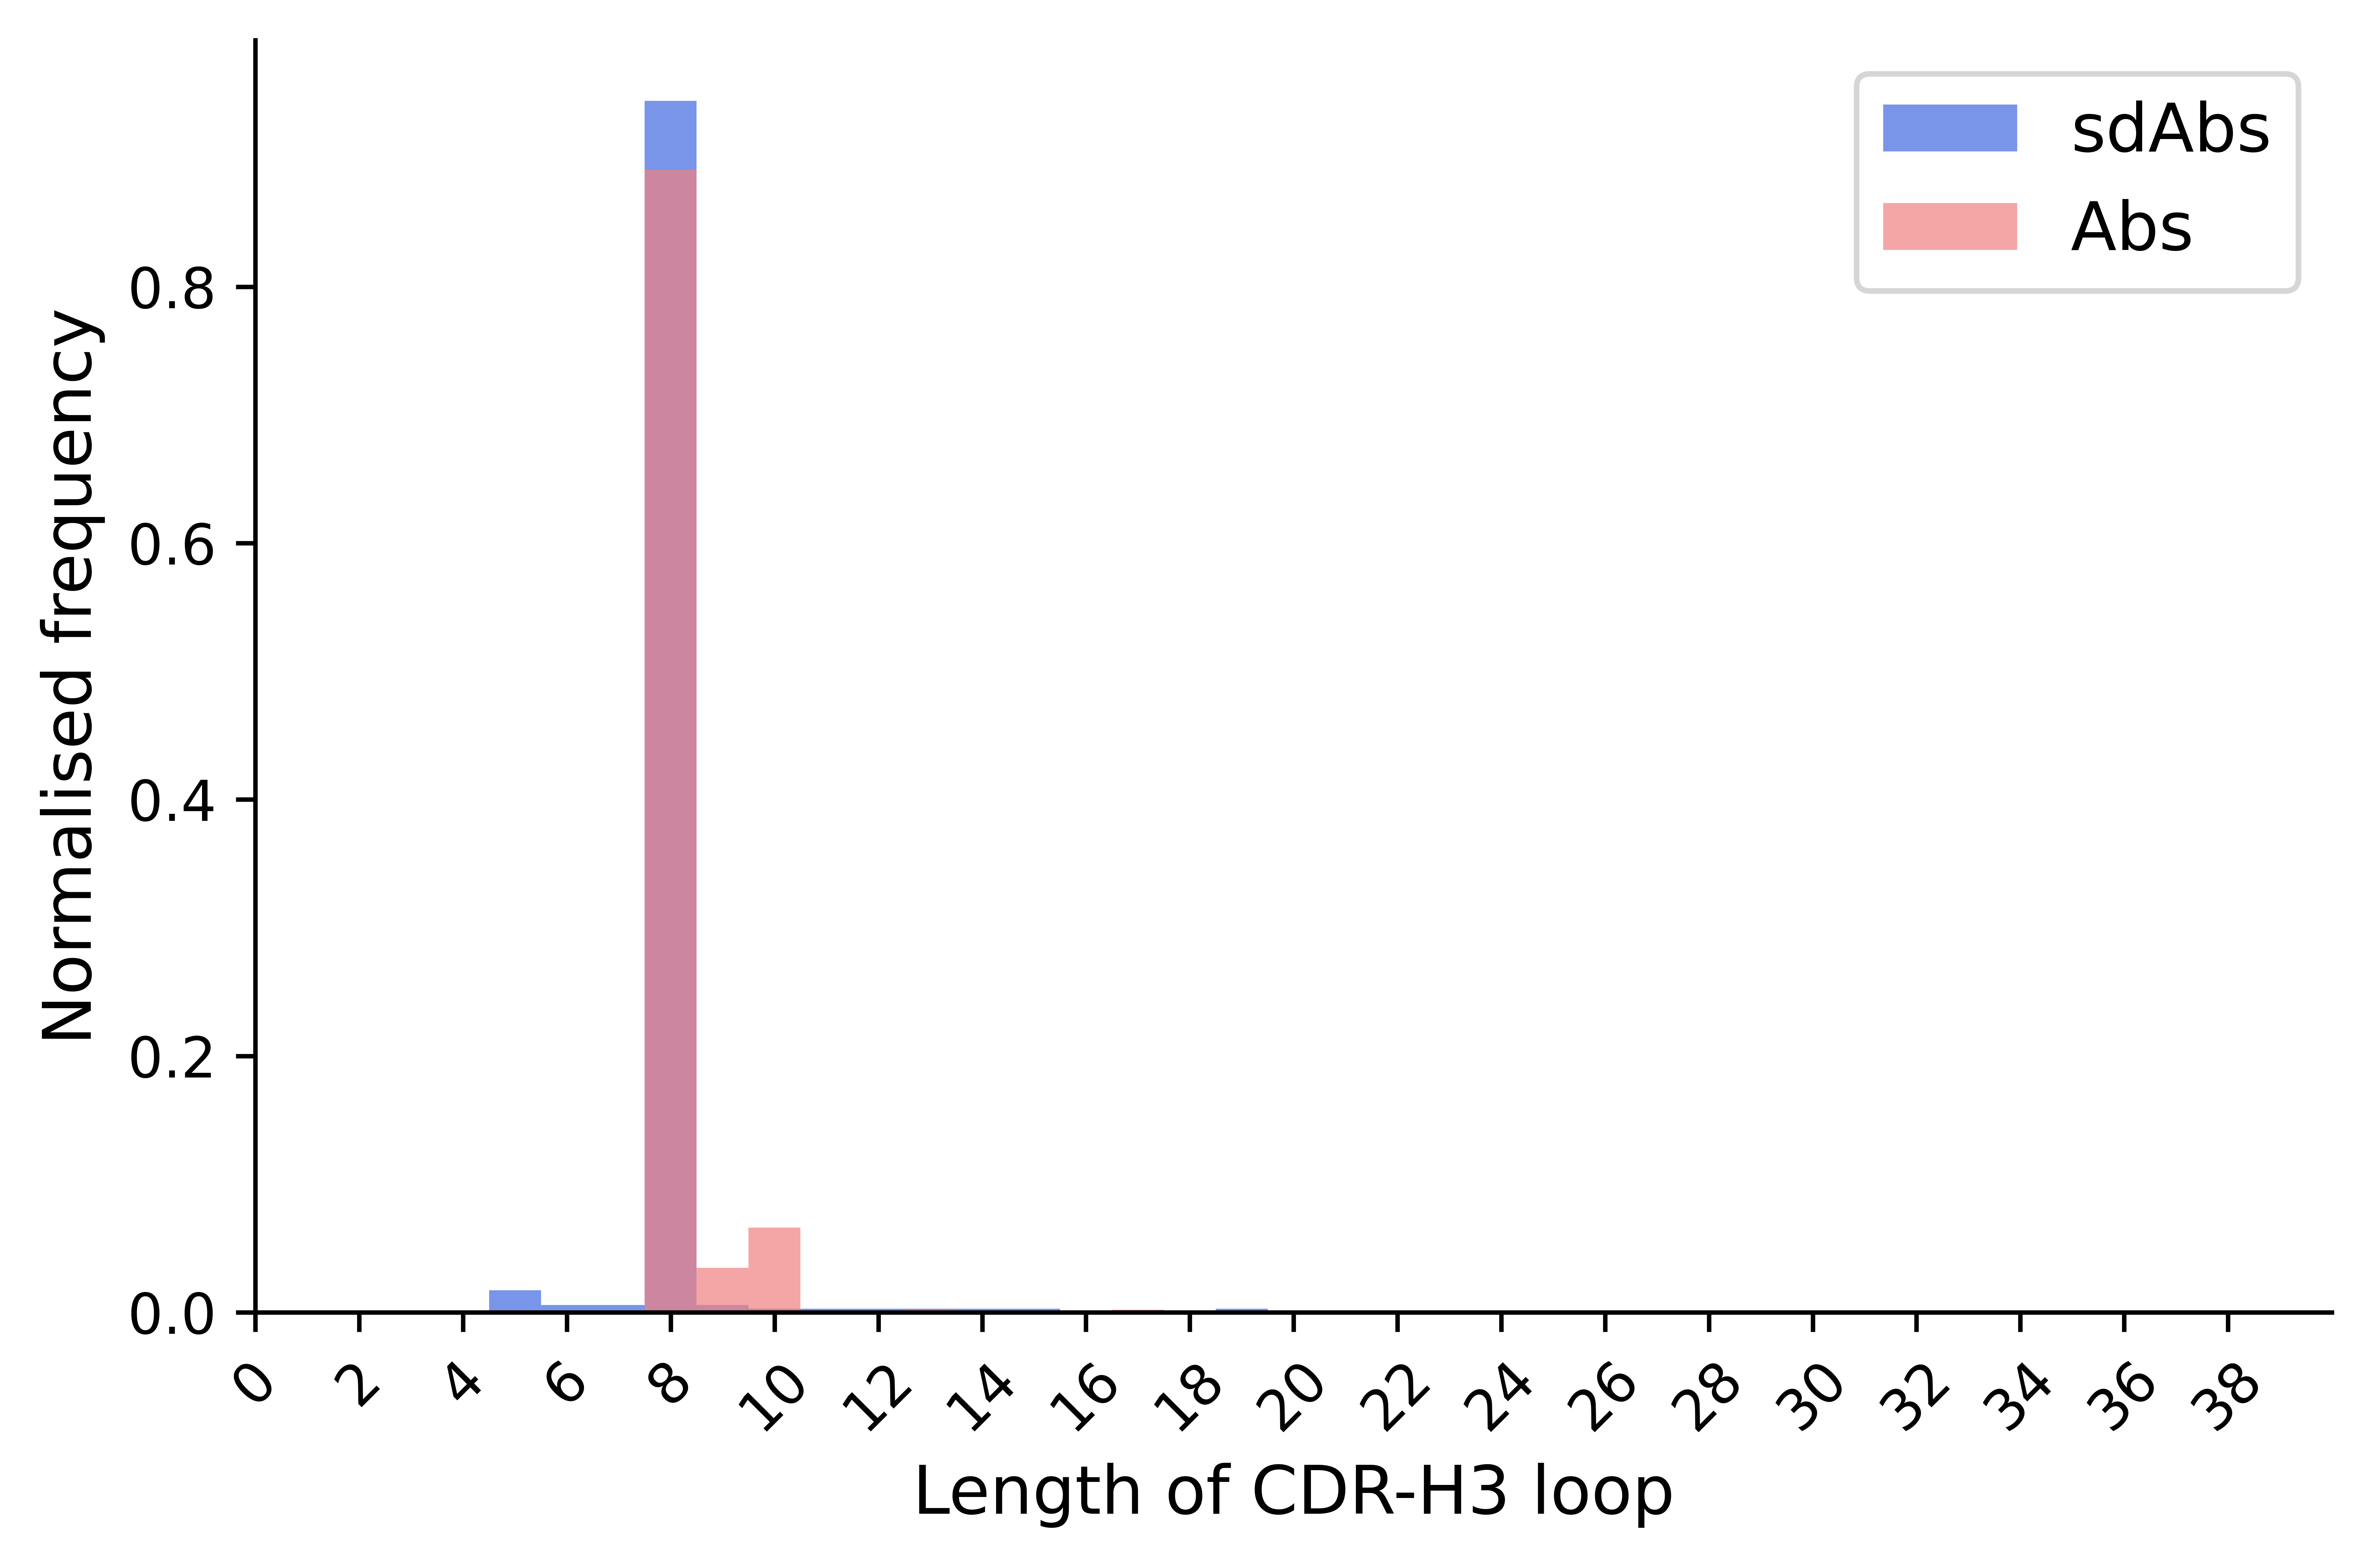

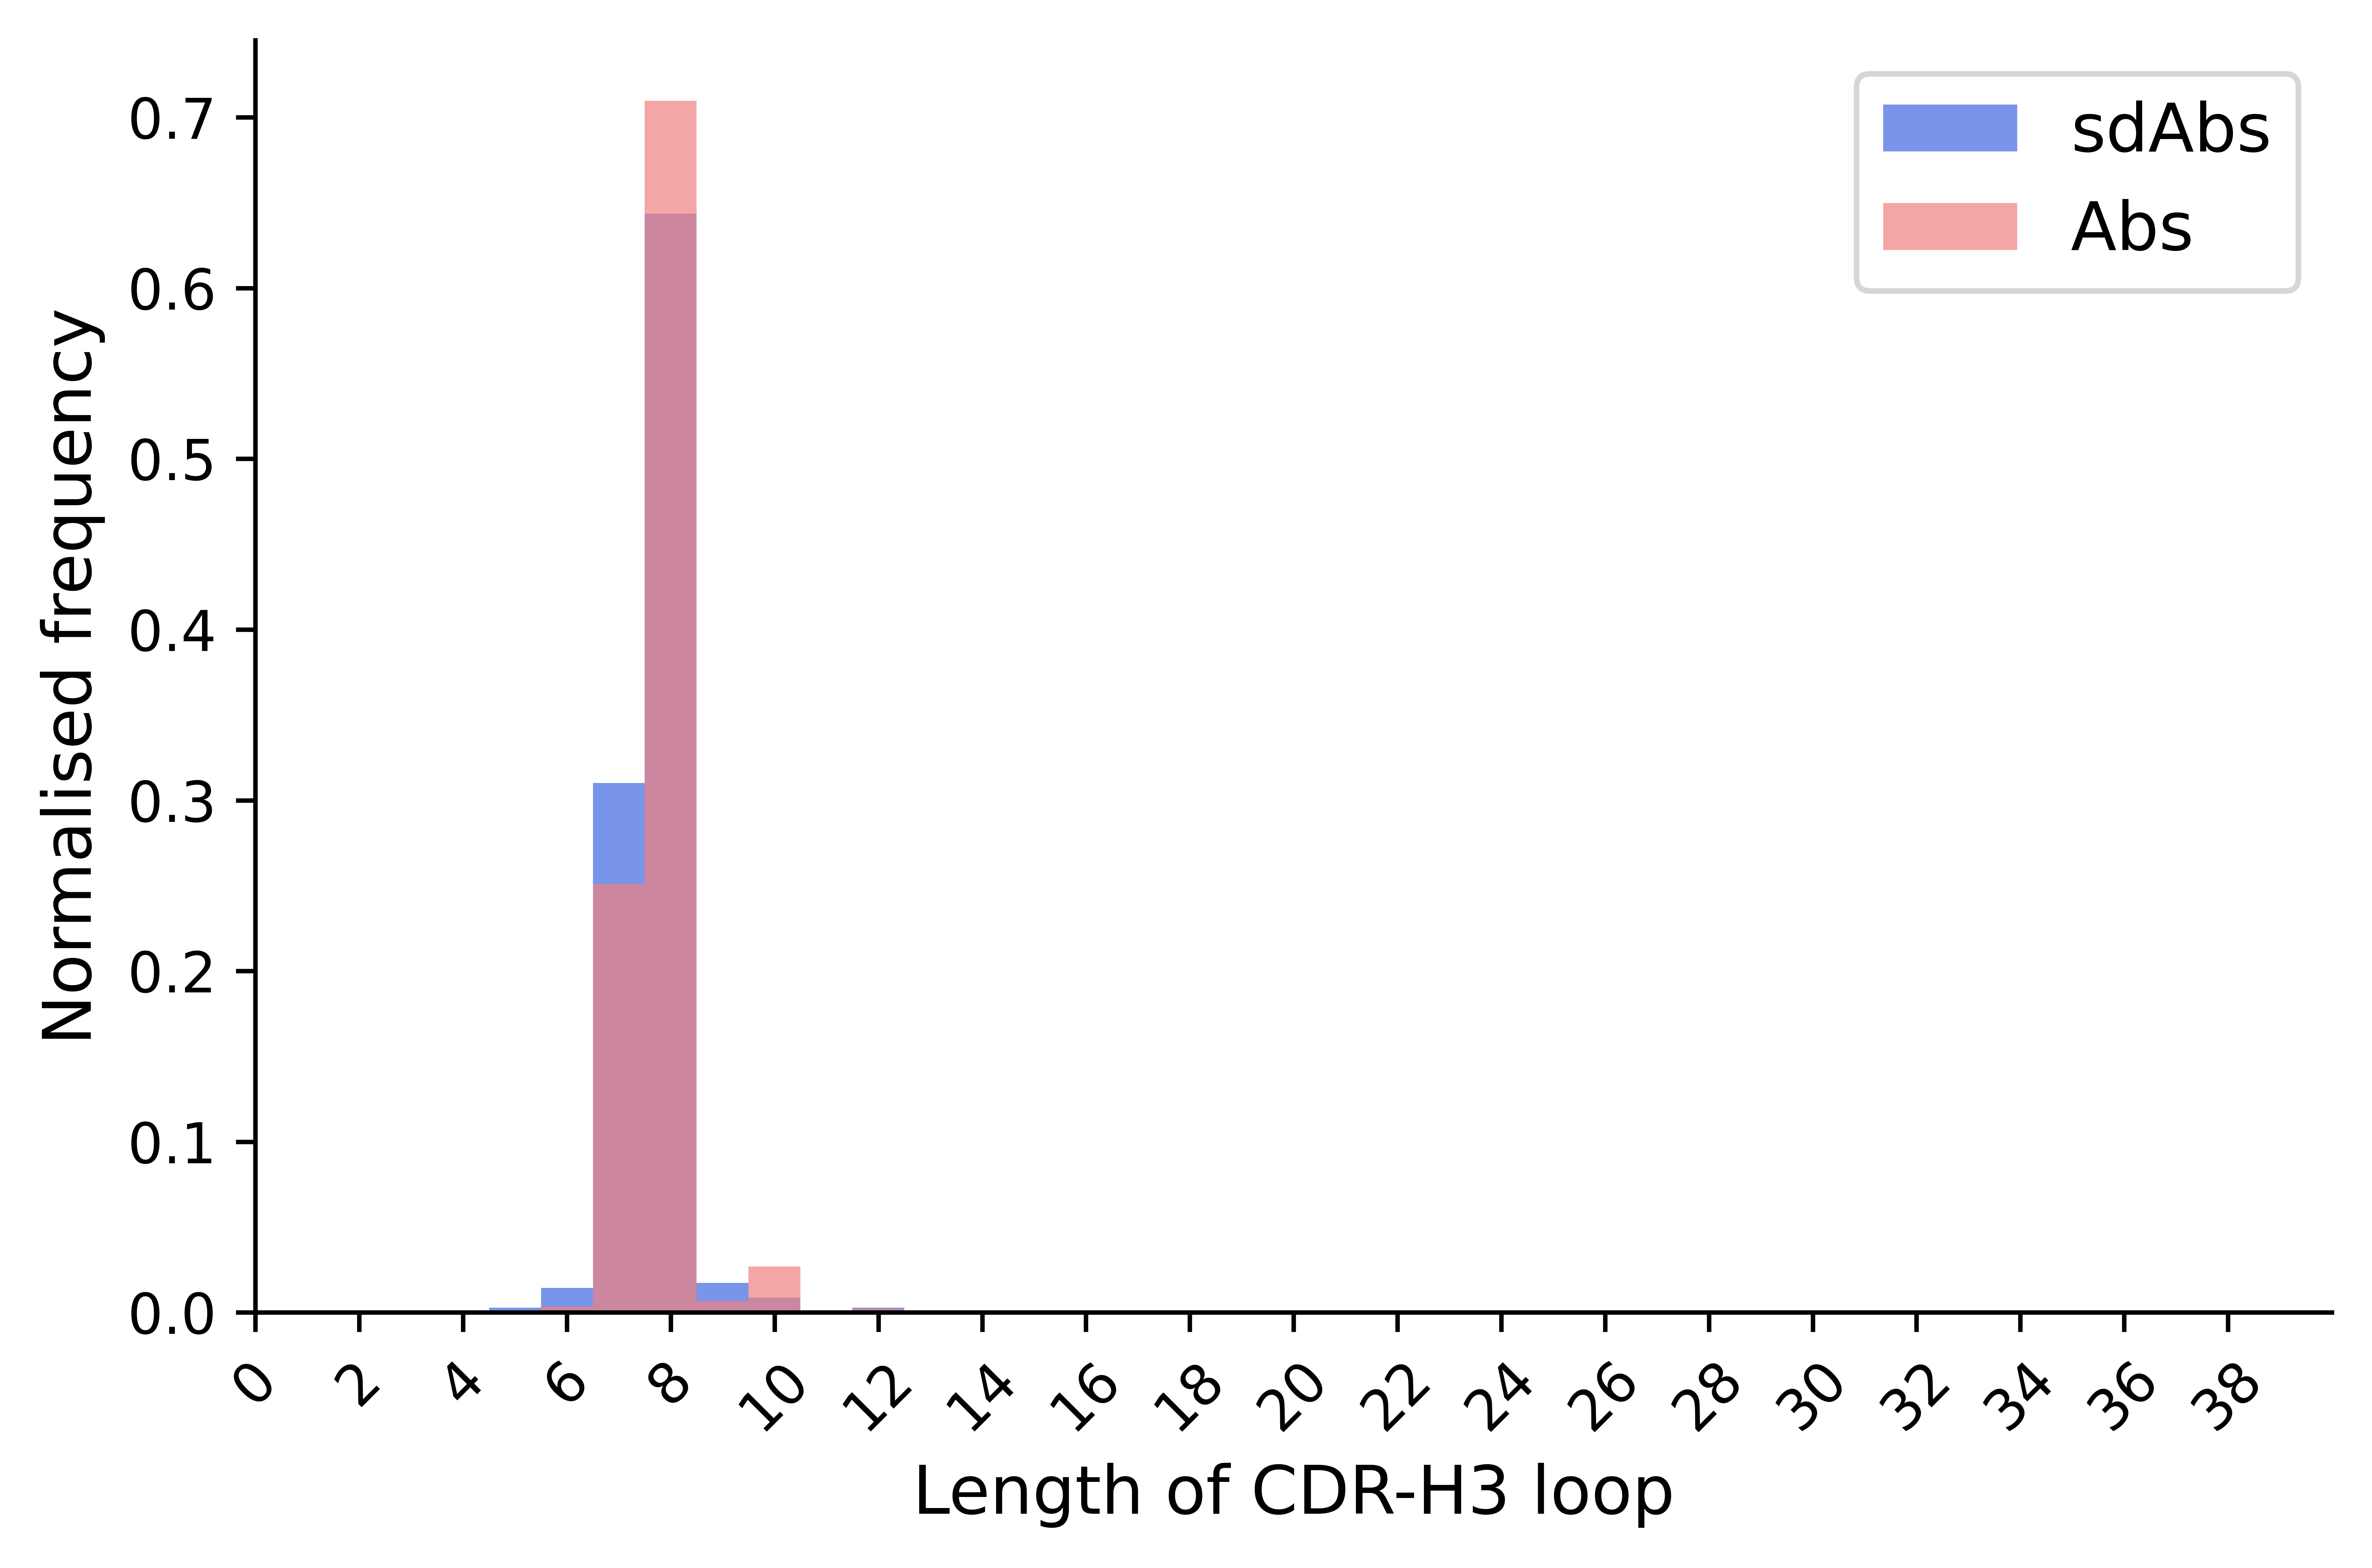

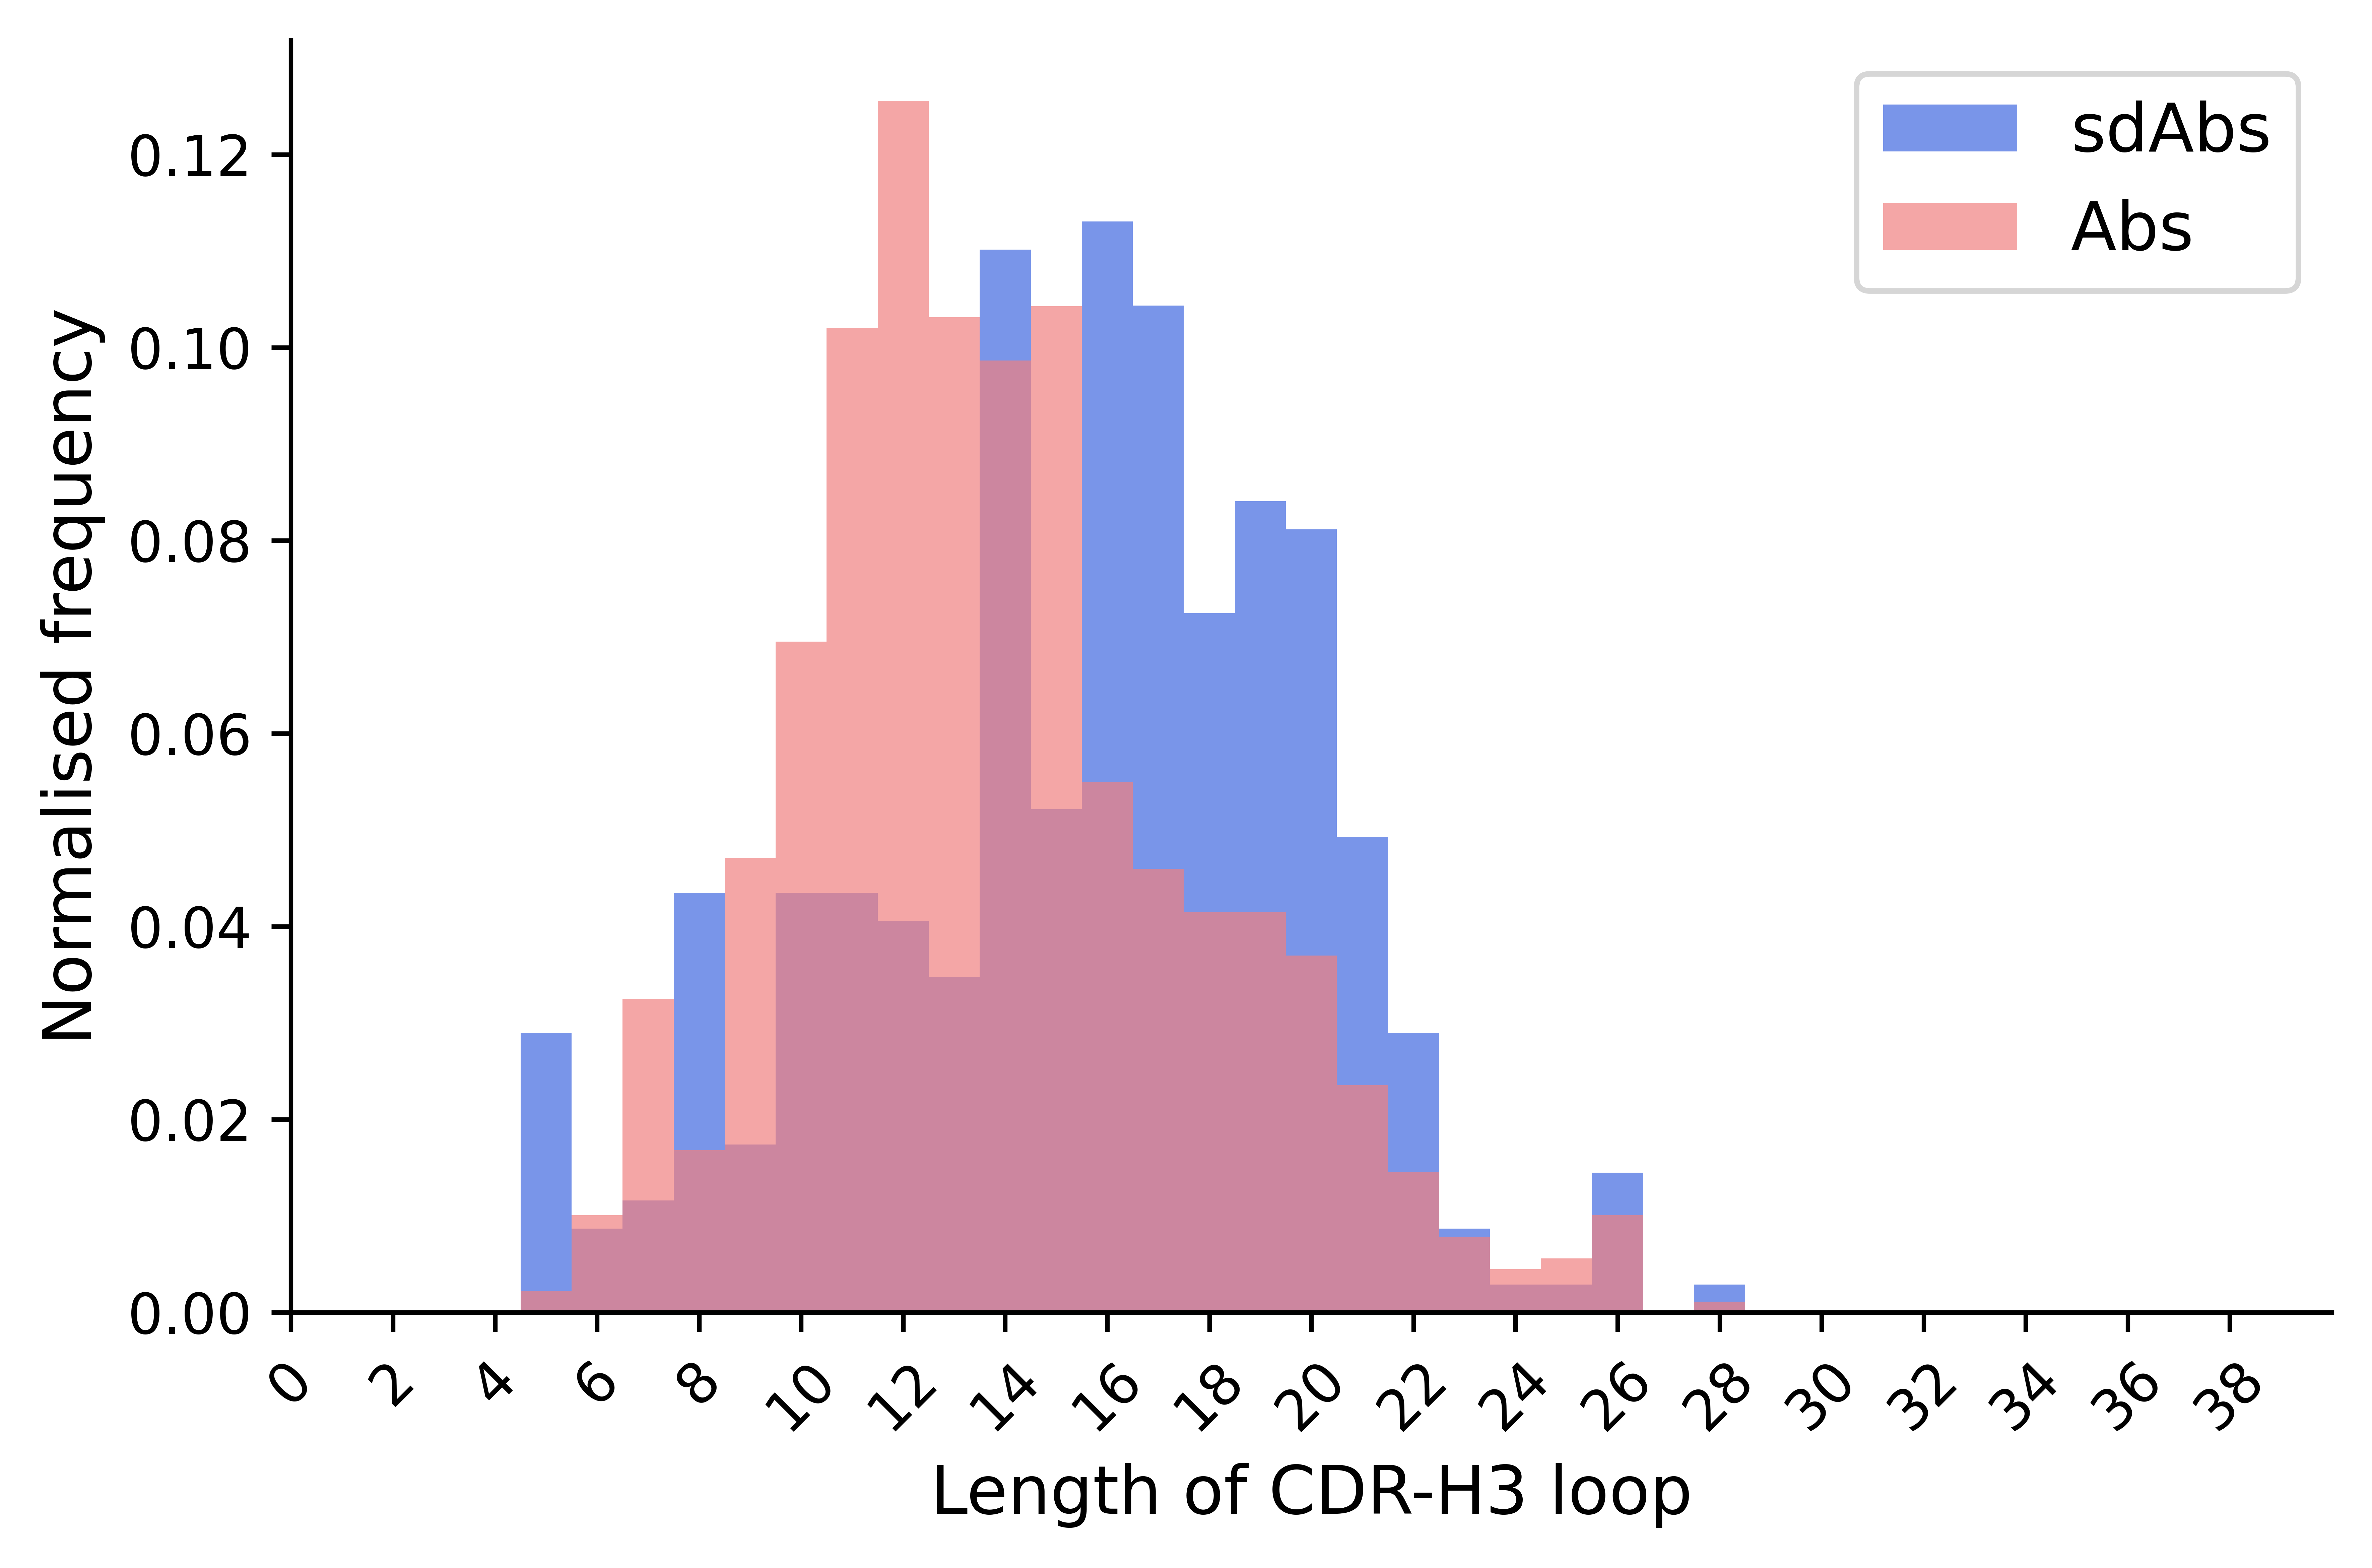

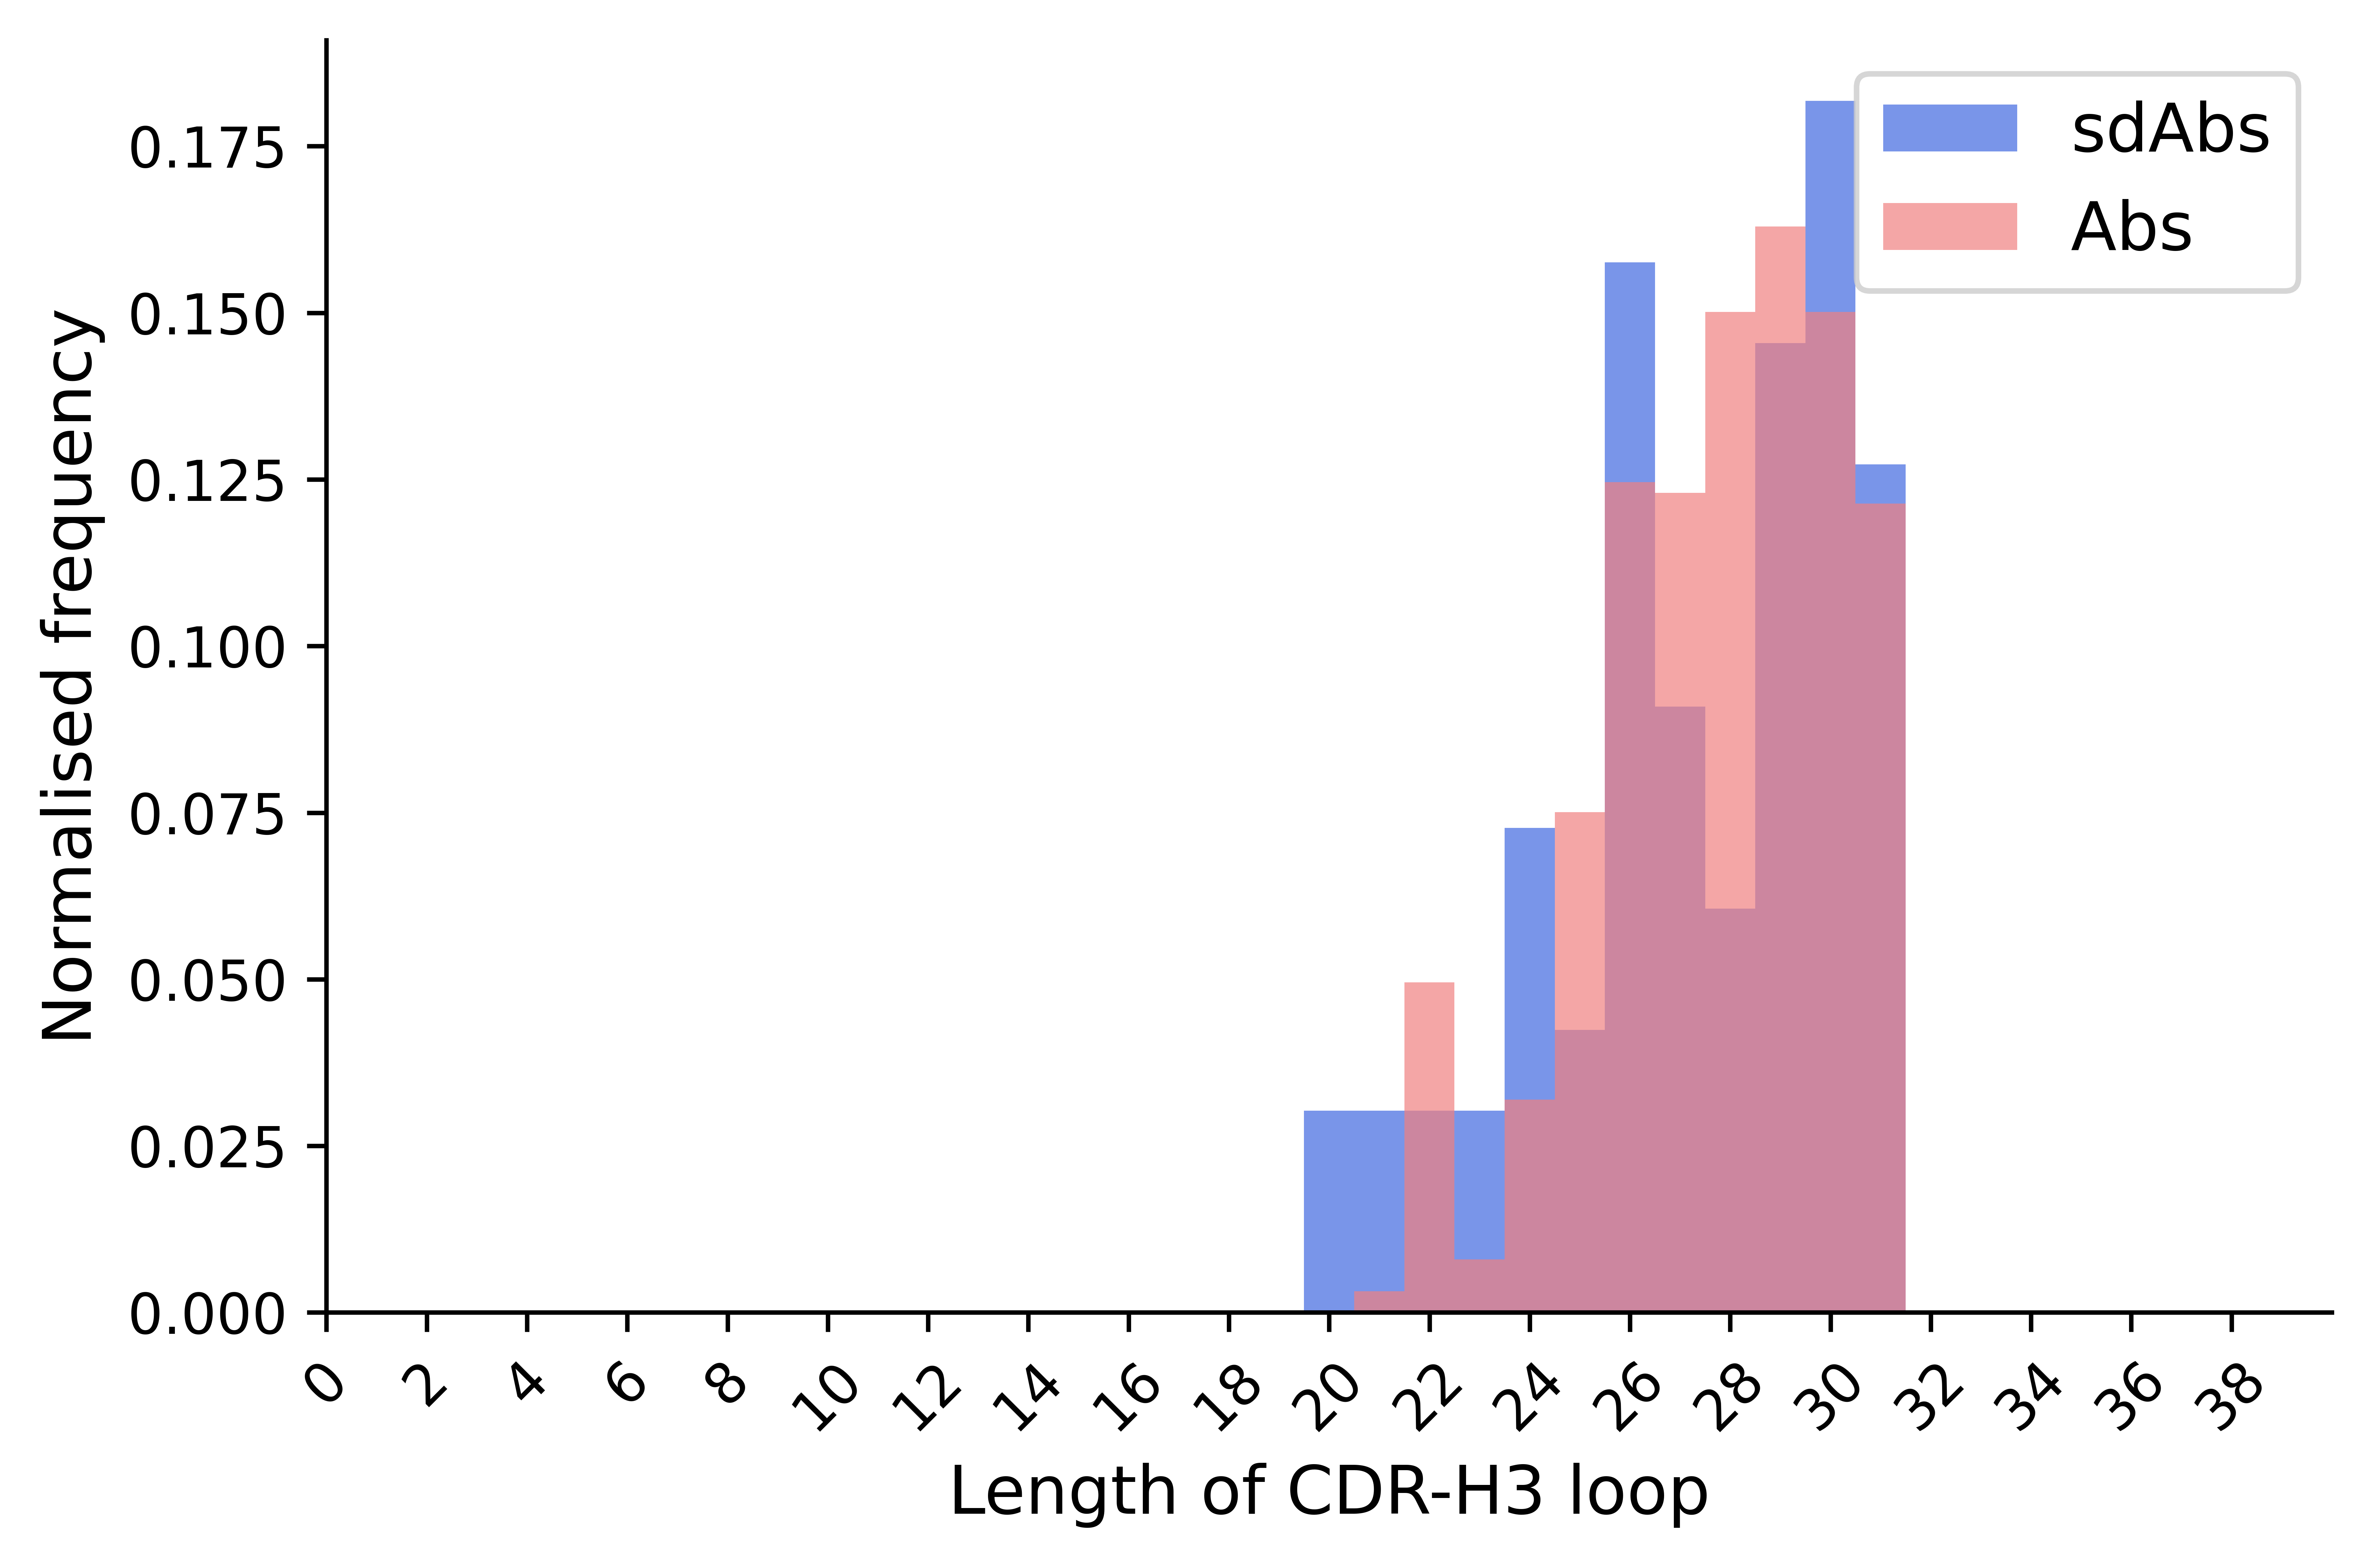

In [6]:
#Plot Nb and full-lenght in one plot
plot_cdrlenght_histogram(cdr_lengths_nb, cdr_lengths_fv, 'sdAbs', 'Abs', 'royalblue', 'lightcoral', xlim=40)

In [7]:
zoutput_CDRH1 = ztest(cdr_lengths_fv['CDRH1'], cdr_lengths_nb['CDRH1'], value=0) 
print(f"ztest CDR-H1: {zoutput_CDRH1}")
zoutput_CDRH2 = ztest(cdr_lengths_fv['CDRH2'], cdr_lengths_nb['CDRH2'], value=0) 
print(f"ztest CDR-H2: {zoutput_CDRH2}")
zoutput_CDRH3 = ztest(cdr_lengths_fv['CDRH3'], cdr_lengths_nb['CDRH3'], value=0) 
print(f"ztest CDR-H3: {zoutput_CDRH3}")

ztest CDR-H1: (3.0288797698567027, 0.0024546234846566876)
ztest CDR-H2: (2.8706013461600457, 0.004096918436120612)
ztest CDR-H3: (-6.063757863020998, 1.3297730677601184e-09)


In [8]:
#### bootstrap resampling

In [9]:
dict_lengths_cdrh1 = {'sdab': cdr_lengths_nb['CDRH1'],
                     'flab': cdr_lengths_fv['CDRH1'] }
perform_bootstrap(300, dict_lengths_cdrh1)

DABEST v0.3.1
             
Good evening!
The current time is Fri Jan 20 12:16:32 2023.

The unpaired mean difference between sdab and flab is 0.143 [95%CI 0.0, 0.267].
The p-value of the two-sided permutation t-test is 0.0314. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


In [10]:
dict_lengths_cdrh2 = {'sdab': cdr_lengths_nb['CDRH2'],
                     'flab': cdr_lengths_fv['CDRH2'] }
perform_bootstrap(300, dict_lengths_cdrh2)

DABEST v0.3.1
             
Good evening!
The current time is Fri Jan 20 12:16:33 2023.

The unpaired mean difference between sdab and flab is 0.0967 [95%CI 0.00333, 0.19].
The p-value of the two-sided permutation t-test is 0.0422. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


In [11]:
dict_lengths_cdrh3 = {'sdab': cdr_lengths_nb['CDRH3'],
                     'flab': cdr_lengths_fv['CDRH3'] }
perform_bootstrap(300, dict_lengths_cdrh3)

DABEST v0.3.1
             
Good evening!
The current time is Fri Jan 20 12:16:37 2023.

The unpaired mean difference between sdab and flab is -1.63 [95%CI -2.32, -0.957].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


In [12]:
#Store dictionaries in dataframe
df_nb_cdrs = pd.DataFrame(cdr_lengths_nb)
df_fv_cdrs = pd.DataFrame(cdr_lengths_fv)

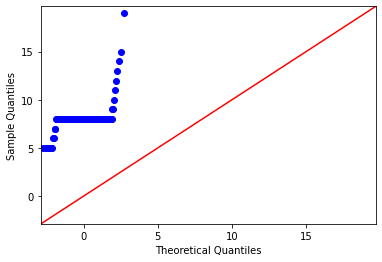

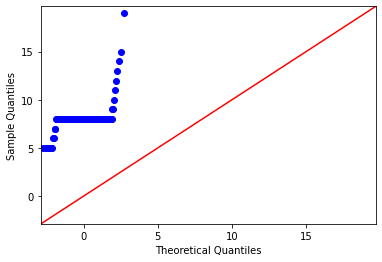

In [13]:
sm.qqplot(df_nb_cdrs.CDRH1, line ='45')

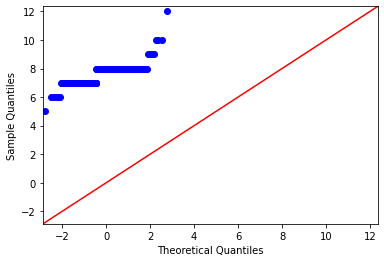

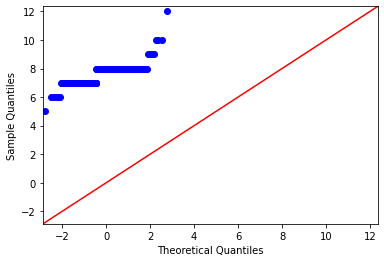

In [14]:
sm.qqplot(df_nb_cdrs.CDRH2, line ='45')

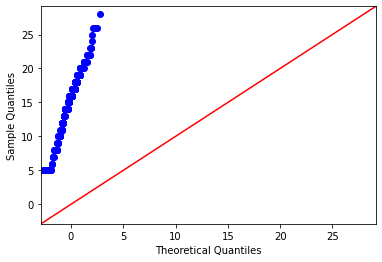

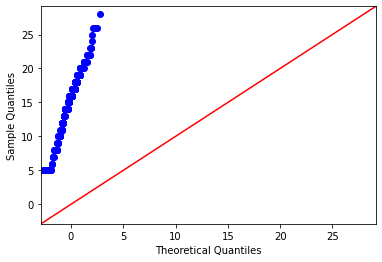

In [15]:
sm.qqplot(df_nb_cdrs.CDRH3, line ='45')

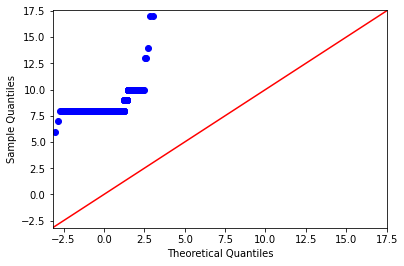

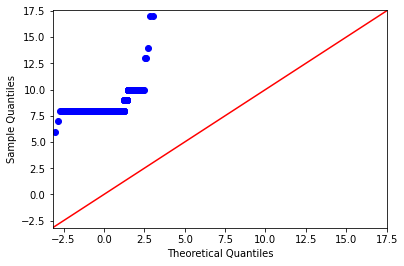

In [16]:
sm.qqplot(df_fv_cdrs.CDRH1, line ='45')

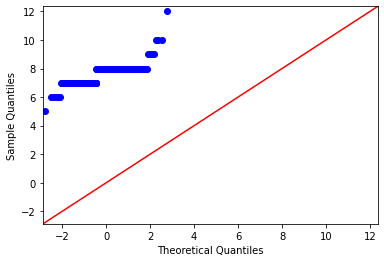

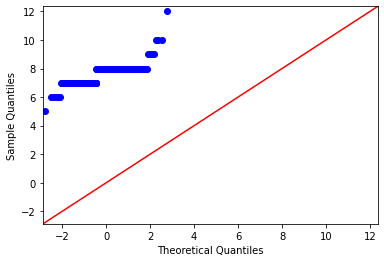

In [17]:
sm.qqplot(df_nb_cdrs.CDRH2, line ='45')

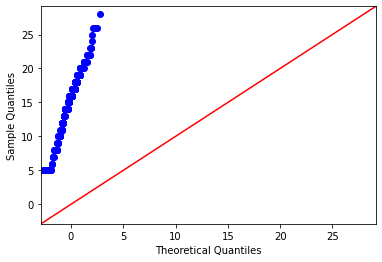

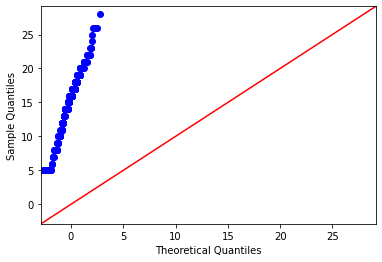

In [18]:
sm.qqplot(df_nb_cdrs.CDRH3, line ='45')